---
---

<h1><center><ins>Exercise Sheet 9</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [1]:
import numpy as np
from scipy import stats
from scipy.optimize import minimize

# Exercise 1 - Fit a straight line 

The attached data file (```mmr_lg.dat```) contains observations of two quantities (mass and metallicity) measured for a sample of nearby galaxies. This file contains four columns: log10(mass), average metallicity, error on log10(mass) and error on average metallicity. 

*For this exercise, you can neglect the error on the mass, and consider only the one on the metallicity.*

**(A)** Fit a straight line to this dataset. To do this, first write down your model, and define the model parameters you will consider. By using the equations we saw in the lecture, compute:

* the best-fit values for your model parameters
* the uncertainties on the parameters, the covariance and the correlation coefficient $r_{\rm ab}$ on the parameters errors
* the goodness of fit. 

**(B)** Discuss the results you obtained in point (A).

**(C)** Compute the Pearson's correlation coefficient $r$ for this data set. How does it relate to the goodness of fit you recovered above? Is it useful to consider this quantity in this case? Why?

In [ ]:
#for this exercise we look at a file, which contains four columns (mass, average metallicity, mass error average metallicity error)

#i want to fit a straight line to the dataset
#i first have to write my own model, and then define the model parameters i will consider --> for this exercise i will only consider the mass, metallicity and its errors

#then, i wanna compute the best-fit values for the model parameters, the uncertainties on the parameters, the covariance and the correlation coefficient on the parameters errors, and the goodness of ft

#first, i have to read the data from the file, and define the model and it's parameters i wanna look at and use

#reading the data from the .dat file
data = np.loadtxt('/home/anita/Desktop/university/bsc/5. Semester/Numerische Methoden/UE/mmr_lg.dat')

#defining the model
#since i wanna fit a staight line to my data, the model is a linear function
#here, k is the slope of the line, and d is the y-intercept
def model(x, k, d):
    return k*x + d

#defining the parameters
#since i only consider the mass, the metallicity and it's error, i will have three parameters
#the mass is the first column of the file, the metallicity is the third column of the file, and its errors are the fourth column of the file
mass = data[:,0] 
metallicity = data[:,1]
metallicity_error = data[:,3]
#the : means that i take all the rows of the column, and the 0 shows me the index of the column

In [ ]:
#now i wanna find out the best-fit values for my model parameters k and d
#to do so, i use the formula of the least-square method: chi^2 = sum((y_i - y_model(x_i))^2 / sigma_i^2)
#here y_i is the data, y_model(x_i) is the model for the data, and sigma_i is the error of the data
#the best-fit values for the parameters are the ones that minimize chi^2

#calculating chi^2
def chi2(parameters, mass, metallicity, metallicity_error):
    k, d = parameters 
    return np.sum((metallicity - model(mass, k, d))**2 / metallicity_error**2)

#finding the best-fit parameters for the model

#i first need an initial guess for my parameters k and d
#then i use the minimize function from the scipy library to find the best-fit values for the parameters
initial_guess = [0, 0]
best_fit = minimize(chi2, initial_guess, args=(mass, metallicity, metallicity_error)) 
#here, args stands for the arguments of the chi2 function, which are the mass, the metallicity and the metallicity error
#the minimize function returns a dictionary with the best-fit values for the parameters, the covariance matrix, the hessian matrix, the number of iterations, the number of function evaluations, the status of the minimization, and the message of the minimization

#finding out the best-fit parameters
best_k, best_d = best_fit.x
#here, the .x gives me the best-fit values for the parameters

print(f'best-fit for slope k: {best_k}')
print(f'best-fit for y-intercept d: {best_d}')
#here, i need the f in front of the string, so that i can use the curly brackets to insert the values of the parameters

best-fit for slope k: 0.272047887069042
best-fit for y-intercept d: -3.4502909460167306


In [ ]:
#now i wanna find out the uncertainties on the parameters, the covariance and the correlation coefficient on the parameters errors

#calculating the uncertainties on the parameters
#i calculate the uncertainties on the parameters by the following formula: sigma_k = sqrt(cov[0,0]), sigma_d = sqrt(cov[1,1])
#here, cov is the covariance matrix, and the diagonal elements of the covariance matrix are the variances of the parameters

#finding the covariance matrix
cov = best_fit.hess_inv 
#here, the .hess_inv gives me the inverse of the hessian matrix, which is the covariance

#finding the uncertainties on the parameters
uncertainty_k = np.sqrt(cov[0,0])
uncertainty_d = np.sqrt(cov[1,1])
#here, the [0,0] gives me the first diagonal element of the covariance matrix, and the [1,1] gives me the second diagonal element of the covariance matrix
#the first diagonal element is the variance of the slope, and the second diagonal element is the variance of the y-intercept

#finding the covariance 
#the covariance is the off-diagonal element of the covariance matrix
covariance = cov[0,1]
# here, the [0,1] gives me the off-diagonal element of the covariance matrix

#finding the correlation coefficient on the parameters errors
#the correlation coefficient is the covariance divided by the product of the uncertainties of the parameters
correlation_coefficient = covariance / (uncertainty_k * uncertainty_d)

print(f'uncertainty on the slope k: {uncertainty_k}')
print(f'uncertainty on the y-intercept d: {uncertainty_d}')
print(f'covariance: {covariance}')
print(f'correlation coefficient: {correlation_coefficient}')


uncertainty on the slope k: 0.030550982823434943
uncertainty on the y-intercept d: 0.19212034649656273
covariance: -0.005659523908972177
correlation coefficient: -0.9642315811815712


In [ ]:
#now i wanna find out the goodness of fit
#the goodness of fit is the reduced chi^2, which is the chi^2 divided by the degrees of freedom
#the degrees of freedom are the number of data points minus the number of parameters

#first, i have to calculate the degrees of freedom
#since i have two parameters, k and d, i need to substitute 2 from the number of data points
degrees_of_freedom = len(metallicity) - 2

#calculating the goodness of fit
goodness_of_fit = chi2(best_fit.x, mass, metallicity, metallicity_error) / degrees_of_freedom 

print(f'goodness of fit: {goodness_of_fit}')

goodness of fit: 1.172225132845071


discussion of k and d  
since k is a negative value, the model is shown by a decreasing linear function  
since d is relatively small, the function closely passes the origin  

discussion of uncertainties, covariance and correlation coefficient  
the uncertainties are both relatively small, indicating a good calculation of their values  
since the covariance is negative, it indicates that the mass is increasing while the metallicity is decreasing  
since the correlation coefficient is negative, it indicates that there is an inverse relationship between the mass and the metallicity  

discussion of the goodness of fit  
since the value of the goodness of fit is >0.05 (5%), which is the standard value of telling whether or not a fit is good or can be rejected, it indicates a good fit

In [ ]:
#now i wanna calculate the pearson correlation coefficient r for the data
#the pearson correlation coefficient is the covariance divided by the product of the standard deviations of the data

#first i have to calculate the standard deviations of the data
std_mass = np.std(mass)
std_metallicity = np.std(metallicity)

#calculating the pearson correlation coefficient
pearson_correlation_coefficient = covariance / (std_mass * std_metallicity)

print(f'pearson correlation coefficient: {pearson_correlation_coefficient}')

pearson correlation coefficient: -0.005612897550874991


discussion of the pearson correlation coefficient  
the value of the pearson correlation coefficient is very different from the goodness of fit calculated before  
relationship between the goodness of fit and the pearson correlation coefficient: the pearson correlation coefficient measures the strength and direction of a linear relationship between two variables, while the goodness of fit quantifies how well a linear model explains the variance in the dependent variable --> for simple linear functions, the relationship can be described as pearson=sqrt(goodness)  

THEY DESCRIBE TWO COMPLETELY DIFFERENT THINGS SO CAN I EVEN SAY WHICH ONE I SHOULD QUANTIFY FOR THIS CASE???

# Exercise 2 - Familiarize with python built-in functions

**(A)** Take a look at the documentation of the following 3 python built-in functions:

* ```numpy.polynomial.polynomial.Polynomial.fit``` (https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html)
* ```scipy.stats.linregress``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
* ```scipy.optimize.curve_fit``` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

Pay attention especially to the quantities and parameters that you need to provide to run these functions, and to those that are returned as result. For each function, provide an answer to the following questions:

1. What possible applications can this function be used for? (e.g.: fit of a straight line to data with errors on the dependent variable)
2. Are the returned quantities providing a full description of the fit? If not, what is missing?

**(B)** Use all the above functions to fit a straight line to the set of data from Exercise 1. What are the results you get for each of these methods? What differences do you find? Compare them also to the ones you obtained in Exercise 1: are there any differences?

**(C)** Fit a parabola to the same dataset. To do this, consider your answers to the questions in point (A) of this exercise, to decide which method to use. Provide all the quantities listed in point (A) of Exercise 1 and discuss the results you obtain, also in comparison to those you obtained when fitting a straight line to the data.

In [ ]:
#Import some useful packages

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial

1) numpy.polynomial.polynomial.Polynomial.fit:
* fits polynomial to data points  
* returning polynomial object that represents fittet polynomial
* not fully described: uncertainties, coefficients, goodness of fit, residuals    
2) scipy.stats.linregress:
* fits straight line to data points (linear regression)
* returning slope, intercept, correlation coefficient, p-value (testing null-hypothesis of correlation), standard error of slope and intercept
* not fully described: uncertainty, residuals  
3) scipy.optimize.curve_fit:
* fits an arbitrary function to data by non-linear least squares
* returning best-fit of parameters and covariance matrix
* not fully described: goodness of fit, residuals

In [ ]:
#now i wanna use those three methods to fit a striaght line onto the data from the first exercise 

#first, i wanna use the np.polynomial.polynomial.Polynomial.fit method
#this method fits a polynomial of degree n to the data
#here, i wanna fit a polynomial of degree 1 to the data

#fitting the polynomial
polynomial = np.polynomial.polynomial.Polynomial.fit(mass, metallicity, 1)
#here, the polynomial.fit method returns a polynomial object, which contains the best-fit values for the parameters

#finding the best-fit values for the parameters
best_fit_polynomial = polynomial.convert().coef
#here, the .convert().coef gives me the best-fit values for the parameters of the polynomial, which include the slope and the intercept

#now, i wanna us the scipy.stats.linregress method
#this method fits a straight line to the data

#fitting the straight line
best_fit_linregress = linregress(mass, metallicity)
#here, the linregress method returns a dictionary with the best-fit values for the parameters, the correlation coefficient, the p-value, the standard error of the slope, the standard error of the y-intercept

#finding the best-fit values for the parameters
best_fit_slope = best_fit_linregress.slope
best_fit_y_intercept = best_fit_linregress.intercept
#here, the .slope gives me the best-fit value for the slope, and the .intercept gives me the best-fit value for the y-intercept


best_fit_curve_fit, covariance_curve_fit = curve_fit(model, mass, metallicity)
#here, the curve_fit method returns a tuple with the best-fit values for the parameters, and the covariance matrix




print(f'best-fit for slope k using the first method: {best_fit_polynomial[1]}')
print(f'best-fit for y-intercept d using the first method: {best_fit_polynomial[0]}')
print(f'best-fit for slope k using the second method: {best_fit_slope}')
print(f'best-fit for y-intercept d using the second method: {best_fit_y_intercept}')
print(f'best-fit for slope k using the third method: {best_fit_curve_fit[0]}')
print(f'best-fit for y-intercept d using the third method: {best_fit_curve_fit[1]}')


best-fit for slope k using the first method: 0.2650819487906169
best-fit for y-intercept d using the first method: -3.422604141339166
best-fit for slope k using the second method: 0.265081948790617
best-fit for y-intercept d using the second method: -3.4226041413391677
best-fit for slope k using the third method: 0.26508194916090716
best-fit for y-intercept d using the third method: -3.4226041433360166


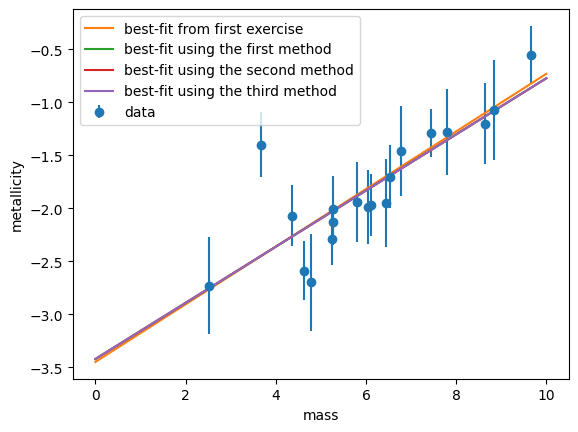

In [ ]:
#now i wanna plot the data together with the staight line using the methods from the first exercise and compare it with the three methods from this exercise

#first, i wanna plot the data
plt.errorbar(mass, metallicity, yerr=metallicity_error, fmt='o', label='data')
# here, the fmt='o' gives me the data points as circles, and the yerr=metallicity_error gives me the error bars for the data points

#now i wanna plot the straight line using the best-fit values from the first exercise
x = np.linspace(0, 10, 100)
y = best_k * x + best_d
plt.plot(x, y, label='best-fit from first exercise')
#here, the np.linspace method returns evenly spaced numbers over a specified interval, and the best_k * x + best_d gives me the

#now i wanna plot the straight line using the best-fit values from the three methods from this exercise
#i again use the formula of the model to calculate the y-values for the x-values

y_polynomial = best_fit_polynomial[1] * x + best_fit_polynomial[0]
plt.plot(x, y_polynomial, label='best-fit using the first method')

y_linregress = best_fit_slope * x + best_fit_y_intercept
plt.plot(x, y_linregress, label='best-fit using the second method')

y_curve_fit = best_fit_curve_fit[0] * x + best_fit_curve_fit[1]
plt.plot(x, y_curve_fit, label='best-fit using the third method')

plt.xlabel('mass')
plt.ylabel('metallicity')
plt.legend()
plt.show()



all the three methods from this exercise give me the same results  
the results from this exercise are different to the result from the first exercise, showing in the intensity of the slope 

In [ ]:
#now i wanna fit a parabola to my data
#i do this by chosing which method from a is the best 
#i also wanna provide all the quantities listed in a of the first exercise and discuss the results i obtain, also in comparison to those you obtained when fitting a straight line to the data

#first, i wanna define the model for the parabola
#the model for the parabola is a quadratic function
#here, k is the coefficient of the x^2 term, l is the coefficient of the x term, and d is the y-intercept
def model_parabola(x, k, l, d):
    return k*x**2 + l*x

#defining the parameters
#since i only consider the mass, the metallicity and it's error, i will have three parameters
#the mass is the first column of the file, the metallicity is the third column of the file, and its errors are the fourth column of the file
#mass = data[:,0]
#metallicity = data[:,2]
#metallicity_error = data[:,3]

#now i wanna find out the best-fit values for my model parameters k, l and d
#to do so, i use the formula of the least-square method: chi^2 = sum((y_i - y_model(x_i))^2 / sigma_i^2)
#here y_i is the data, y_model(x_i) is the model for the data, and sigma_i is the error of the data
#the best-fit values for the parameters are the ones that minimize chi^2

#calculating chi^2
def chi2_parabola(parameters, mass, metallicity, metallicity_error):
    k, l, d = parameters
    return np.sum((metallicity - model_parabola(mass, k, l, d))**2 / metallicity_error**2)

#finding the best-fit parameters for the model

#i first need an initial guess for my parameters k, l and d
#then i use the minimize function from the scipy library to find the best-fit values for the parameters
initial_guess_parabola = [0, 0, 0]
best_fit_parabola = minimize(chi2_parabola, initial_guess_parabola, args=(mass, metallicity, metallicity_error))
#here, args stands for the arguments of the chi2 function, which are the mass, the metallicity and the metallicity error

#finding out the best-fit parameters
best_k_parabola, best_l_parabola, best_d_parabola = best_fit_parabola.x
#here, the .x gives me the best-fit values for the parameters

print(f'best-fit for coefficient of the x^2 term k: {best_k_parabola}')
print(f'best-fit for coefficient of the x term l: {best_l_parabola}')
print(f'best-fit for y-intercept d: {best_d_parabola}')
#here, i need the f in front of the string, so that i can use the curly brackets to insert the values of the parameters


best-fit for coefficient of the x^2 term k: 0.08396061005157078
best-fit for coefficient of the x term l: -0.8423939937234217
best-fit for y-intercept d: 0.0


In [ ]:
#now i wanna find out the uncertainties on the parameters, the covariance and the correlation coefficient on the parameters errors

#calculating the uncertainties on the parameters
#i calculate the uncertainties on the parameters by the following formula: sigma_k = sqrt(cov[0,0]), sigma_l = sqrt(cov[1,1]), sigma_d = sqrt(cov[2,2])
#here, cov is the covariance matrix, and the diagonal elements of the covariance matrix are the variances of the parameters

#finding the covariance matrix
cov_parabola = best_fit_parabola.hess_inv
#here, the .hess_inv gives me the inverse of the hessian matrix, which is the covariance

#finding the uncertainties on the parameters
uncertainty_k_parabola = np.sqrt(cov_parabola[0,0])
uncertainty_l_parabola = np.sqrt(cov_parabola[1,1])
uncertainty_d_parabola = np.sqrt(cov_parabola[2,2])
#here, the [0,0] gives me the first diagonal element of the covariance matrix, and the [1,1] gives me the second diagonal element of the covariance matrix
#the first diagonal element is the variance of the coefficient of the x^2 term, the second diagonal element is the variance of the coefficient of the x term, and the third diagonal element is the variance of the y-intercept

#finding the covariance
#the covariance is the off-diagonal element of the covariance matrix
covariance_parabola = cov_parabola[0,1]
# here, the [0,1] gives me the off-diagonal element of the covariance matrix

#finding the correlation coefficient on the parameters errors
#the correlation coefficient is the covariance divided by the product of the uncertainties of the parameters
correlation_coefficient_parabola = covariance_parabola / (uncertainty_k_parabola * uncertainty_l_parabola)

print(f'uncertainty on the coefficient of the x^2 term k: {uncertainty_k_parabola}')
print(f'uncertainty on the coefficient of the x term l: {uncertainty_l_parabola}')
print(f'uncertainty on the y-intercept d: {uncertainty_d_parabola}')
print(f'covariance: {covariance_parabola}')
print(f'correlation coefficient: {correlation_coefficient_parabola}')

uncertainty on the coefficient of the x^2 term k: 0.004676615558169379
uncertainty on the coefficient of the x term l: 0.033597429385117845
uncertainty on the y-intercept d: 1.0
covariance: -0.00015249005443319387
correlation coefficient: -0.9705184579515108


In [ ]:
#the goodness of fit is the reduced chi^2, which is the chi^2 divided by the degrees of freedom
#the degrees of freedom are the number of data points minus the number of parameters

#first, i have to calculate the degrees of freedom
#since i have three parameters, k, l and d, i need to substitute 3 from the number of data points
degrees_of_freedom_parabola = len(metallicity) - 3

#calculating the goodness of fit
goodness_of_fit_parabola = chi2_parabola(best_fit_parabola.x, mass, metallicity, metallicity_error) / degrees_of_freedom_parabola

print(f'goodness of fit: {goodness_of_fit_parabola}')

goodness of fit: 1.2518862005771525


discussion  
negative slope --> decreasing linear function  
close to origin  

basically the same arguments as in 1 for all the different values  

HARD TO COMPARE WITH THE STRAIGHT LINE SINCE WE'RE LOOKING AT A PARABOLIC FUNCTION AND NOT AT A LINEAR SO WE HAVE MORE PARAMETERS TO LOOK AT???

# Exercise 3 - Preparation to MCMC fitting

**(A)** Read the blog entry "*Bayesian inference problem, MCMC and variational inference*" that you can find at this link: https://towardsdatascience.com/bayesian-inference-problem-mcmc-and-variational-inference-25a8aa9bce29

You can skip the part on Variational Inference, but please read carefully the parts on Bayesian inference and MCMC. After reading this text, write a brief answer (in your words!) to each of the following questions:

* What does each of the terms in Bayes' Theorem represent?
* If you had no knowledge about the probability for some event to occur, what type of distribution would you use for the prior?
* If you had new observations about the probability for some event to occur, how would you incorporate this in a Bayesian framework?
* What does MCMC mean? What is it?
* What is the main purpose of MCMC, and how is it related to Bayesian inference?

**(B)** The ```emcee``` package is a python implementation of a MCMC ensemble sampler, and is widely used in astronomy. In this task you will only have to install the packages ```emcee``` and ```corner``` (which is useful for plotting results) on your computer. You should be able to simply use ```pip``` to do that. 

If you need help, you can take a look at the "Installation" section in the webpage containing the documentation of ```emcee```: https://emcee.readthedocs.io/en/stable/. 

When you have installed these packages, run the following cell to make sure that everything went well and that you can indeed import them without errors.

In [13]:
import emcee   #likely need to install with pip first... e.g.,   pip install emcee
import corner  #likely need to install with pip first... e.g.,   pip install corner

**(C)** Please repeat Exercise 2 from Exercise Sheet 8, but this time use the emcee package. Do you get the same result as with your own implementation of an MCMC sampler? What is the difference between the sampler implemented by the emcee package and the Metropolis-Hastings algorithm?

1) bayes' theorem: 
* the bayes' theorem describes the updated probability of an event A happening, after event B happened (which A is depending on)
* posterior = (likelihood*prior)/evidence

2) non-informative prior: for each outcome, the same probability is being assigned 

3) updating the prior and the likelihood

4) MCMC:
* marcov chain monte carlo
* algorithm for sampling a complex probability distribution 
* for when no direct sampling is possible
* approximating goal distribution 

5) generating samples from complex posterior distributions in the bayes' inference (good for when there is no analytical acces to the distribution)

THE INSTALLATION OF BOTH PACKAGES WORKED WITHOUT ANY ISSUES!!!

You must install the tqdm library to use progress indicators with emcee


Estimated mu: 6.731417395605028, Estimated sigma: 15.779159509937092


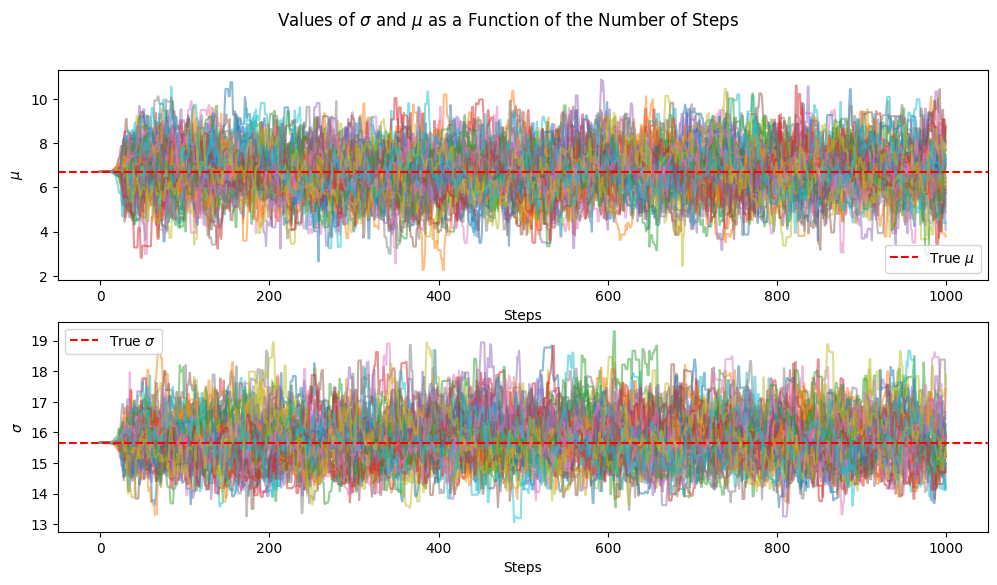

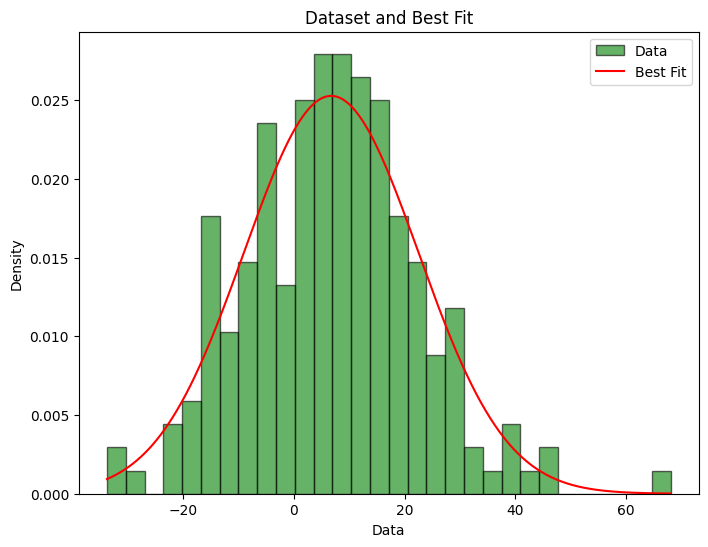

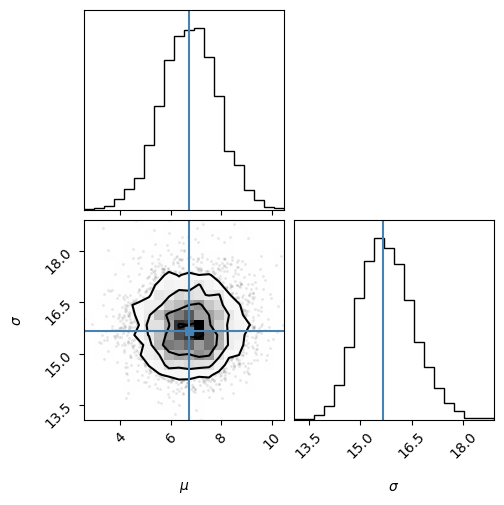

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

#importing the data from the file
data = np.loadtxt('/home/anita/Desktop/university/bsc/5. Semester/Numerische Methoden/UE/input_data(1).txt')

#i first have to define the log-prior, log-likelihood and log-posterior functions

#defining the log-prior function
def log_prior(parameters):
    mu, sigma = parameters
    if sigma > 0:  #ensuring sigma is positive
        return 0.0  #flat prior for sigma
    return -np.inf  #rejecting invalid sigma values (sigma <= 0)

#defining the log-likelihood function
#for this, i use the formula of the normal distribution: p(x|mu, sigma) = exp(-0.5 * sum((x - mu)^2) / sigma^2) / (sigma * sqrt(2 * pi))
def log_likelihood(parameters, data):
    mu, sigma = parameters
    return -0.5 * np.sum((data - mu)**2 / sigma**2 + np.log(2 * np.pi * sigma**2)) # log-likelihood of the data

#defining the log-posterior function
#for this, i use the formula of the bayes theorem: p(mu, sigma|x) = p(x|mu, sigma) * p(mu, sigma) / p(x)
def log_posterior(parameters, data):
    lp = log_prior(parameters) #log-prior
    if not np.isfinite(lp): #checking whether the prior is finite
        return -np.inf #returning negative infinity if the prior is not finite
    return lp + log_likelihood(parameters, data) # log-posterior

#now i wanna use the emcee package to get the same result as with the own implementation done back then
#i first have to initialize the parameters for the MCMC sampler

#initializing parameters for the mcmc sampler
n_walkers = 50  #number of walkers
#walkers are multiple chains of parameters that are evolved in parallel during the mcmc sampling process 
n_dim = 2  #number of parameters (mu and sigma)
initial_guess = np.array([np.mean(data), np.std(data)])  # starting point
original_position = initial_guess + 1e-4 * np.random.randn(n_walkers, n_dim) #initial positions for the walkers

#now i have to run the mcmc sampler
sampler = emcee.EnsembleSampler(n_walkers, n_dim, log_posterior, args=(data,))
#here, the EnsembleSampler class is used to sample the posterior distribution

#now i have to run the mcmc sampler
n_steps = 1000 # number of steps
sampler.run_mcmc(original_position, n_steps, progress=True)
#here, the run_mcmc method runs the mcmc sampler for a certain number of steps

#now i have to get the samples from the mcmc sampler
samples = sampler.get_chain(discard=100, thin=10, flat=True)  # getting the samples
mu_mcmc, sigma_mcmc = np.mean(samples, axis=0)  # mean values for mu and sigma
print(f"Estimated mu: {mu_mcmc}, Estimated sigma: {sigma_mcmc}")

#plotting mu as a function of the number of steps
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(sampler.get_chain()[:, :, 0], alpha=0.5)
plt.axhline(np.mean(data), color='r', linestyle='--', label='True $\mu$')
plt.xlabel('Steps')
plt.ylabel('$\mu$')
plt.legend()

#plotting sigma as a function of the number of steps
plt.subplot(2, 1, 2)
plt.plot(sampler.get_chain()[:, :, 1], alpha=0.5)
plt.axhline(np.std(data), color='r', linestyle='--', label='True $\sigma$')
plt.xlabel('Steps')
plt.ylabel('$\sigma$')
plt.legend()

plt.suptitle('Values of $\sigma$ and $\mu$ as a Function of the Number of Steps')
plt.show()

#plotting the dataset and the best fit
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', edgecolor="black", label='Data') 
best_fit = norm(mu_mcmc, sigma_mcmc)  # Best fit for the data
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, best_fit.pdf(x), 'r-', label='Best Fit')
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Dataset and Best Fit')
plt.legend()
plt.show()

#corner plot for posterior distribution
fig = corner.corner(samples, labels=["$\\mu$", "$\\sigma$"], truths=[np.mean(data), np.std(data)])
plt.show()


the first two plots show mu and sigma as a function of number of steps  
the first plot tracks the estimated mu of the distribution over the sampling steps  
if sample is converging correctly, it should stabilize around the true mu value  
the second plot tracks the estimated sigma of the distribution over the sampling steps  
if sample is converging correctly, it should stabilize around the true value of sigma

the second plot shows a huge difference to the original one from the last exercise  
the density values to the single data points (sampled values of mu and sigma, computed as the means of the mcmc samples) are way higher  
those also show a closer form of the gaussian distribution  
the best fit function has a lower peak  

the last plot shows the corner plot of the posterior distribution (bayes' theorem)  
it is important to show the difference of the emcee sampler to the own implementation of the metropolis-hashtings algorithm  
the two plots with the functions show the distribution of the parameters mu and sigma --> posterior values after running the mcmc sampler  
the scatter plot shows the relationship between those two parameters mu and sigma  
it displays if there is a correlation between them or not --> if yes: clear pattern 

